# Exoplanets Detection with Artificial Neural Networks

We continue the research, and build an artificial neural network for this application.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
roc_auc_score, roc_curve
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Read Data Set

In [2]:
path = 'data/'
cumulative = pd.read_csv(path + 'cumulative_2020.08.29_14.21.21.csv', skiprows=53)
df = cumulative.copy()

## Data Preprocessing

In [3]:
exoplanets = df.loc[df['koi_disposition'] != 'CANDIDATE']
candidates = df.loc[df['koi_disposition'] == 'CANDIDATE']

In [4]:
df_exo = exoplanets.copy()
df_can = candidates.copy()

### Clean Data

In [5]:
def clean_data(df):
    '''
    Function to clean data
    '''
    df = df.copy()

    df.drop(columns=['kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_tce_delivname'], inplace=True)

    df.drop(columns = ['koi_teq_err1', 'koi_teq_err2'], inplace=True)
    
    df.dropna(axis=0, inplace=True)

    return df

exoplanets = clean_data(df_exo)

### Split Data to Train, Validation and Test Set

In [6]:
test_size = 0.15

train_valid, test = train_test_split(exoplanets, test_size=test_size, random_state=0, stratify=exoplanets['koi_disposition'])

In [7]:
test_size = 0.15

train, valid = train_test_split(exoplanets, test_size=test_size, random_state=0, stratify=exoplanets['koi_disposition'])

In [8]:
train.shape[0], valid.shape[0], test.shape[0]

(5113, 903, 903)

In [9]:
X_train = train.drop('koi_disposition', axis=1)
y_train = train['koi_disposition']

X_valid = valid.drop('koi_disposition', axis=1)
y_valid = valid['koi_disposition']

X_test = test.drop('koi_disposition', axis=1)
y_test = test['koi_disposition']

### Standardization of Data for Gradient Descent

In [10]:
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

### Label Encoding of Target

In [11]:
le = LabelEncoder()

y_train_le = le.fit_transform(y_train)
y_valid_le = le.transform(y_valid)
y_test_le = le.transform(y_test)

## Model - Artificial Neural Network

In [12]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=8, activation='relu'),
    
    tf.keras.layers.Dense(units=16, activation='relu'),
    
    tf.keras.layers.Dense(units=32, activation='relu'),
    
    tf.keras.layers.Dense(units=16, activation='relu'),

    tf.keras.layers.Dense(units=8, activation='relu'),

    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [13]:
ann.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['binary_accuracy', 'Precision', 'Recall', 'AUC'])

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10, # Number of epochs with no improvement after which training will be stopped
    min_delta=0.001, # Minimum change in the monitored quantity to qualify as an improvement
    restore_best_weights=True, # Whether to restore model weights from the epoch with the best value of the monitored quantity
)

### Training

In [15]:
history = ann.fit(X_train_std, y_train_le,
                  validation_data=[X_valid_std, y_valid_le],
                  batch_size=32,
                  callbacks=[early_stopping],
                  epochs=100)

Epoch 1/100
160/160 [==============================] - 3s 8ms/step - loss: 0.3578 - binary_accuracy: 0.8840 - precision: 0.9552 - recall: 0.8532 - auc: 0.9541 - val_loss: 0.0631 - val_binary_accuracy: 0.9834 - val_precision: 0.9892 - val_recall: 0.9840 - val_auc: 0.9959
Epoch 2/100
160/160 [==============================] - ETA: 0s - loss: 0.0570 - binary_accuracy: 0.9835 - precision: 0.9867 - recall: 0.9867 - auc: 0.99 - 1s 4ms/step - loss: 0.0550 - binary_accuracy: 0.9844 - precision: 0.9874 - recall: 0.9874 - auc: 0.9954 - val_loss: 0.0475 - val_binary_accuracy: 0.9812 - val_precision: 0.9823 - val_recall: 0.9875 - val_auc: 0.9972
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.0381 - binary_accuracy: 0.9890 - precision: 0.9906 - recall: 0.9918 - auc: 0.9979 - val_loss: 0.0433 - val_binary_accuracy: 0.9823 - val_precision: 0.9823 - val_recall: 0.9893 - val_auc: 0.9973
Epoch 4/100
160/160 [==============================] - 1s 3ms/step - loss: 0.0318 - bin

In [16]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 336       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,697
Trainable params: 1,697
Non-trainabl

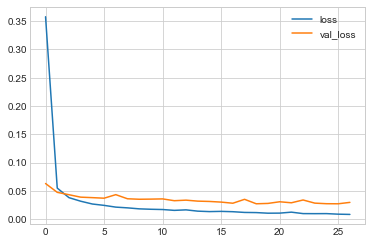

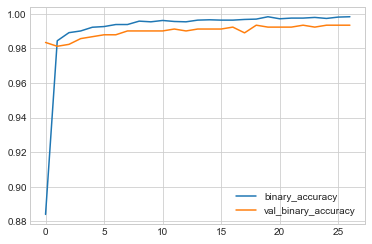

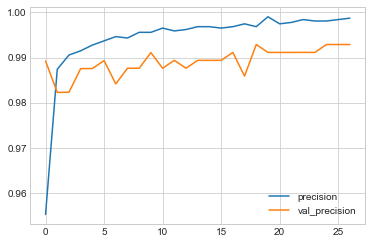

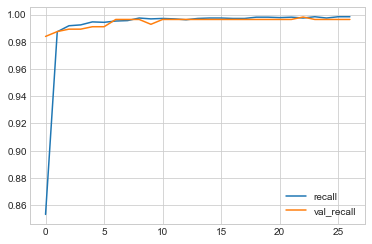

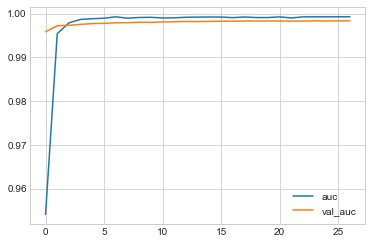

In [17]:
history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
history_frame.loc[:, ['precision', 'val_precision']].plot()
history_frame.loc[:, ['recall', 'val_recall']].plot()
history_frame.loc[:, ['auc', 'val_auc']].plot()
plt.show()

In [18]:
history_frame.sort_values('val_auc', ascending=False)

,loss,binary_accuracy,precision,recall,auc,val_loss,val_binary_accuracy,val_precision,val_recall,val_auc
26,0.008460,0.998240,0.998739,0.998425,0.999289,0.029739,0.993355,0.992895,0.996435,0.998356
23,0.009799,0.997849,0.998110,0.998425,0.999275,0.028408,0.992248,0.991135,0.996435,0.998345
25,0.008885,0.998044,0.998425,0.998425,0.999287,0.027248,0.993355,0.992895,0.996435,0.998335
24,0.009878,0.997262,0.998108,0.997479,0.999273,0.027380,0.993355,0.992895,0.996435,0.998330
19,0.010619,0.998240,0.999054,0.998110,0.999110,0.027896,0.992248,0.991135,0.996435,0.998324
20,0.010751,0.997066,0.997480,0.997795,0.999262,0.030812,0.992248,0.991135,0.996435,0.998319
18,0.011689,0.996871,0.996853,0.998110,0.999102,0.027267,0.993355,0.992895,0.996435,0.998314
17,0.011962,0.996675,0.997479,0.997164,0.999238,0.035135,0.988926,0.985891,0.996435,0.998301
22,0.009903,0.997457,0.998423,0.997479,0.999272,0.033964,0.993355,0.991150,0.998217,0.998296
21,0.012445,0.997457,0.997795,0.998110,0.999004,0.029008,0.992248,0.991135,0.996435,0.998288


In [19]:
print(('Best Validation Loss: {:0.4f}' +\
      '\nBest Validation AUC: {:0.4f}')\
      .format(history_frame['val_loss'].min(), 
              history_frame['val_auc'].max()))

Best Validation Loss: 0.0272
Best Validation AUC: 0.9984


## Model Evaluation

In [20]:
def model_evaluation(model, X_test, y, y_pred):
    """
    Function to compute classification metrics using the F1 score and confusion matrix
    """
    Accuracy_score = accuracy_score(y, y_pred)
    Precision_score = precision_score(y, y_pred)
    Recall_score = recall_score(y, y_pred)
    F1_score = f1_score(y, y_pred)
    Roc_auc_score = roc_auc_score(y, model.predict(X_test).reshape(-1,1))
    
    print(f'Accuracy score: {Accuracy_score:.4f}')
    print(f'Precision score: {Precision_score:.4f}')
    print(f'Recall score: {Recall_score:.4f}')
    print(f'F1 score: {F1_score:.4f}')
    print(f'AUC score: {Roc_auc_score:.4f}')

In [21]:
y_pred = (ann.predict(X_test_std) >= 0.5).astype('int8')

In [22]:
model_evaluation(model=ann, X_test=X_test_std, y=y_test_le, y_pred=y_pred)

Accuracy score: 0.9922
Precision score: 0.9911
Recall score: 0.9964
F1 score: 0.9938
AUC score: 0.9985


## Discovering Exoplanets with ANN

In [23]:
def discover_possible_exoplanets(model, X_candidates, candidates):
    # Setting up confirmed and false positive array
    confirmed = []
    false_positive = []
    
    # Predicting the candidate exoplanets
    results = pd.Series(model.predict(X_candidates).flatten(), index=candidates.index)
    candidates.insert(3, 'koi_disposition_pred', results)
    
    # Looping trough all the planets predictions
    for index, planet in candidates.iterrows():
        if planet['koi_disposition_pred'] == 0:
            confirmed.append({'name': planet['kepoi_name'], 'index': planet.index})
        else:
            false_positive.append({'name': planet['kepoi_name'], 'index': planet.index})

    discovery_rate = float(len(confirmed))/candidates.shape[0]*100

    print(f'\nExoplanets: {len(confirmed)} have been Confirmed')
    print(f'\nExoplanets: {len(false_positive)} are False Positive')
    print(f'\nDiscovery Rate: {discovery_rate:.4f}%')

In [24]:
candidates = df_can.copy()

In [25]:
X_candidates = candidates.drop('koi_disposition', axis=1)
X_candidates = clean_data(X_candidates)

In [26]:
candidates = pd.DataFrame(candidates, index=X_candidates.index)

In [27]:
discover_possible_exoplanets(model=ann, X_candidates=X_candidates, candidates=candidates)


Exoplanets: 176 have been Confirmed

Exoplanets: 1611 are False Positive

Discovery Rate: 9.8489%


In [28]:
candidates

,kepid,kepoi_name,kepler_name,koi_disposition_pred,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2,10811496,K00753.01,NaN,1.000000,CANDIDATE,CANDIDATE,0.000,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
37,11138155,K00760.01,NaN,1.000000,CANDIDATE,CANDIDATE,1.000,0,0,0,...,-77.0,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263
58,11818800,K00777.01,NaN,1.000000,CANDIDATE,CANDIDATE,0.999,0,0,0,...,-163.0,4.507,0.116,-0.105,0.781,0.116,-0.095,294.31686,50.080231,15.487
62,11918099,K00780.02,NaN,1.000000,CANDIDATE,CANDIDATE,0.993,0,0,0,...,-79.0,4.595,0.012,-0.064,0.765,0.055,-0.028,293.83331,50.230350,15.334
63,9579641,K00115.03,NaN,0.005762,CANDIDATE,CANDIDATE,0.871,0,0,0,...,-115.0,4.339,0.132,-0.108,1.087,0.157,-0.142,287.88733,46.276241,12.791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,9938836,K07978.01,NaN,0.000000,CANDIDATE,CANDIDATE,0.843,0,0,0,...,-242.0,3.890,0.405,-0.135,2.219,0.536,-0.996,285.30768,46.829803,13.729
9542,10011213,K07982.01,NaN,1.000000,CANDIDATE,CANDIDATE,0.189,0,0,0,...,-225.0,4.488,0.054,-0.216,0.955,0.291,-0.097,291.60455,46.973289,15.632
9552,10028127,K08193.01,NaN,1.000000,CANDIDATE,CANDIDATE,0.519,0,0,0,...,-166.0,4.561,0.030,-0.170,0.855,0.207,-0.069,297.73398,46.961529,15.719
9560,10128825,K07986.01,NaN,1.000000,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757


Using the ANN, there are 176 discovered exoplanets, and 1611 false positives.

The performance of the ANN is $F_1 = 0.9938$. The number of predicted exoplanets of the ANN are around the expected value, and with further optimization of the ANN, we can have a model that can discover exoplanets from measured data of the Kepler space telescope.